<a href="https://colab.research.google.com/github/NdumbiData/Fraudulent-Transaction-Detection-for-Digital-Money-Transfer/blob/main/EDA_%26_Feature_Notebook_(04_features_eda_ipynb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Data analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the Cleaned data set

df= pd.read_csv('/content/drive/MyDrive/Data Science Internship/cleaned_data_nova_pay_Combined.csv')

df.head(1)

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,US,USD,CAD,ATM,278.19,278.19,4.25,...,0.123,standard,263,0.522,0,0.223,0,0,0.0,0


In [49]:
df.columns.to_list()

['transaction_id',
 'customer_id',
 'timestamp',
 'home_country',
 'source_currency',
 'dest_currency',
 'channel',
 'amount_src',
 'amount_usd',
 'fee',
 'exchange_rate_src_to_dest',
 'device_id',
 'new_device',
 'ip_address',
 'ip_country',
 'location_mismatch',
 'ip_risk_score',
 'kyc_tier',
 'account_age_days',
 'device_trust_score',
 'chargeback_history_count',
 'risk_score_internal',
 'txn_velocity_1h',
 'txn_velocity_24h',
 'corridor_risk',
 'is_fraud']

In [50]:
#start by getting the coorelation of the "is fraud" column to other features.

df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

,is_fraud
is_fraud,1.000000
txn_velocity_24h,0.751737
txn_velocity_1h,0.688367
risk_score_internal,0.602002
chargeback_history_count,0.581129
ip_risk_score,0.520355
location_mismatch,0.418109
new_device,0.378426
corridor_risk,0.193732
exchange_rate_src_to_dest,0.152592


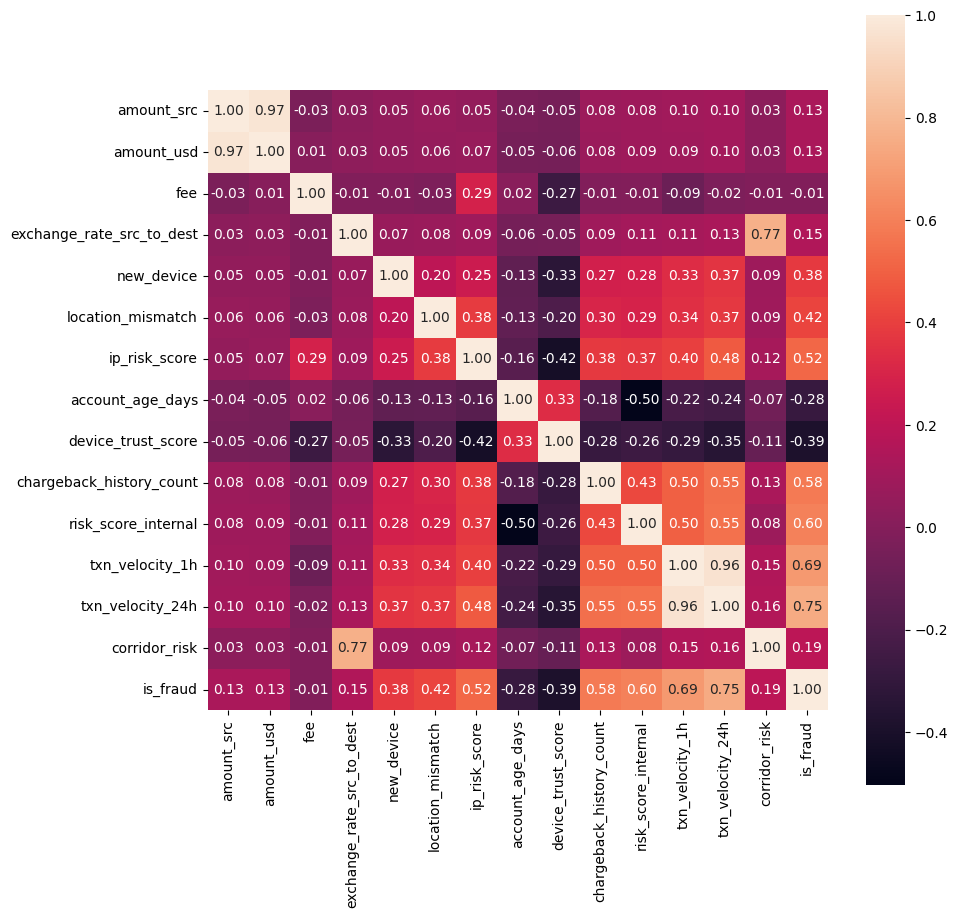

In [51]:
#df.corr Heatmap to figure relationships to fraud

corr = df.corr(numeric_only=True)

plt.figure(figsize = (10,10))

hm = sns.heatmap(corr, cbar=True , annot=True, square =True, fmt='.2f', annot_kws={"size":10});

Univariate Analysis

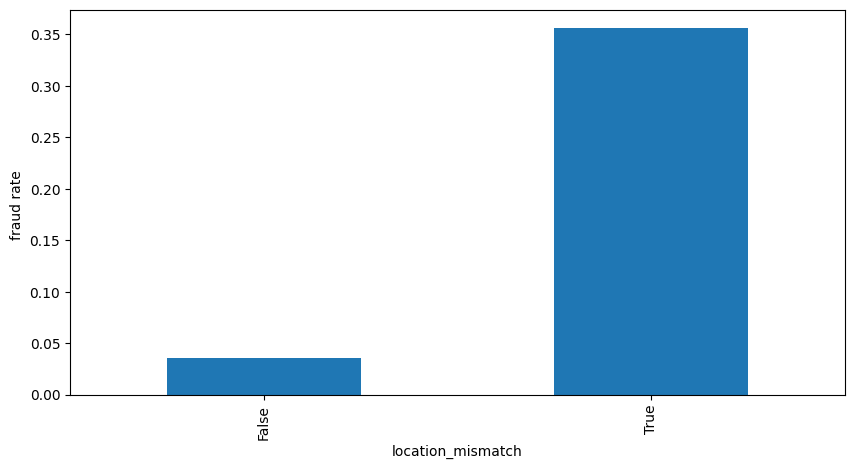

In [52]:
# Visualisation on location mismatch and fraud

df.groupby('location_mismatch')['is_fraud'].mean().plot.bar(figsize=(10,5))
plt.xlabel("location_mismatch")
plt.ylabel("fraud rate ")
plt.show()

In [53]:
# combine categorical features to a dataframe for analysing

cat_cols= df.select_dtypes(include={'object','category'}).columns
print(cat_cols)

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'device_id',
       'ip_address', 'ip_country', 'kyc_tier'],
      dtype='object')


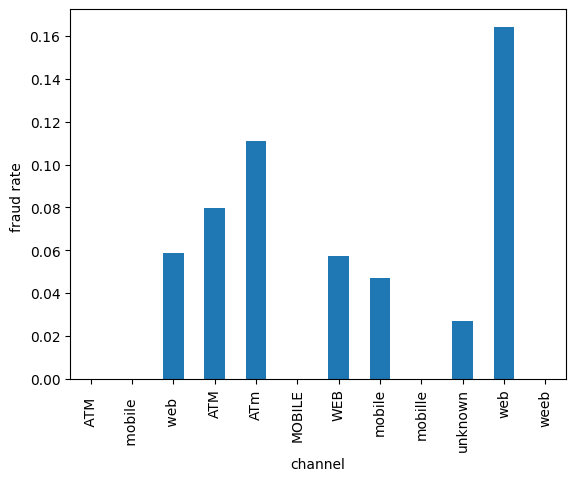

In [54]:
# lets do a visualisation on the cat features and is fraud .

df.groupby('channel')['is_fraud'].mean().plot.bar()
plt.xlabel("channel")
plt.ylabel("fraud rate ")
plt.show()

In [55]:
df['channel'].unique()

array(['ATM', 'web', 'mobile', 'WEB', ' web  ', 'MOBILE', 'mobille',
       'unknown', ' mobile  ', 'weeb', 'ATm', ' ATM  '], dtype=object)

In [56]:
from pandas.core.arrays.boolean import coerce_to_array
# Need to combine the variables to one , Only four words allowed (atm),(mobile),(web) and corce null values)

if 'channel' in df.columns:
    df['channel'] = df['channel'].str.replace('ATm', 'atm')
    df['channel'] = df['channel'].str.replace('MOBILE', 'mobile')
    df['channel'] = df['channel'].str.replace('weeb', 'web')
    df['channel'] = df['channel'].str.replace('WEB', 'web')
    df['channel'] = df['channel'].str.replace('mobille', 'mobile')
    df['channel'] = df['channel'].str.replace(' web', 'web')
    df['channel'] = df['channel'].str.replace('ATM', 'atm')
    df['channel'] = df['channel'].str.replace('web  ', 'web')
    df['channel'] = df['channel'].str.replace(' atm  ', 'atm')
    df['channel'] = df['channel'].str.replace(' mobile  ', 'mobile')
else:
  # coerce to null values
  pass

In [72]:
df['channel'].unique()

array(['atm', 'web', 'mobile', 'unknown'], dtype=object)

In [73]:
df['channel'].value_counts()

,count
channel,
mobile,6483
web,3804
atm,1015
unknown,37


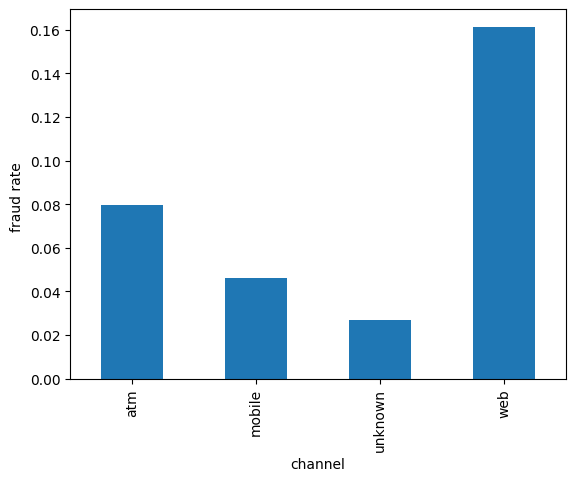

In [74]:
# lets do a visualisation on the channel features and is fraud .

df.groupby('channel')['is_fraud'].mean().plot.bar()
plt.xlabel("channel")
plt.ylabel("fraud rate ")
plt.show()


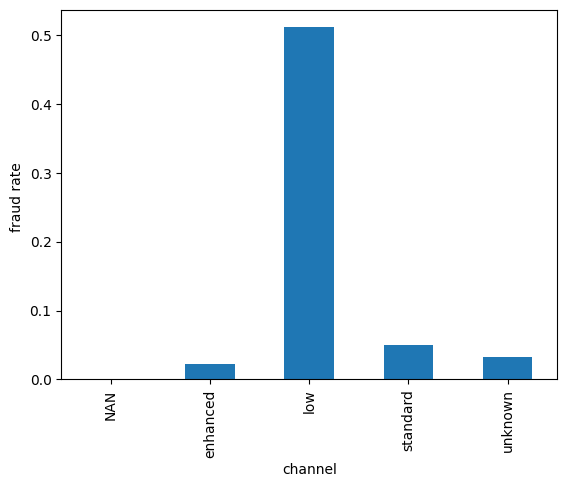

In [75]:
# lets do a visualisation on the Kyc features and is fraud .

df.groupby('kyc_tier')['is_fraud'].mean().plot.bar()
plt.xlabel("channel")
plt.ylabel("fraud rate ")
plt.show()

In [76]:
df['kyc_tier'].unique().tolist()

['standard', 'enhanced', 'low', 'NAN', 'unknown']

In [77]:
if 'kyc_tier' in df.columns:

    df['kyc_tier'] = df['kyc_tier'].str.replace(' standard  ', 'standard')
    df['kyc_tier'] = df['kyc_tier'].str.replace(' enhanced  ', 'enhanced')
    df['kyc_tier'] = df['kyc_tier'].str.replace('LOW', 'low')
    df['kyc_tier'] = df['kyc_tier'].str.replace('standrd', 'standard')
    df['kyc_tier'] = df['kyc_tier'].str.replace('STANDARD', 'standard')
    df['kyc_tier'] = df['kyc_tier'].str.replace('enhancd', 'enhanced')
    df['kyc_tier'] = df['kyc_tier'].str.replace(' low  ', 'low')
    df['kyc_tier'] = df['kyc_tier'].str.replace('ENHANCED', 'enhanced')
    df['kyc_tier'] = df['kyc_tier'].str.replace(' nan  ', 'NAN')

else:
  # coerce to null values
  pass

In [78]:
df['kyc_tier'].unique().tolist()

['standard', 'enhanced', 'low', 'NAN', 'unknown']

In [79]:
# i need to coerce the nan( null values )



df['kyc_tier'] = df['kyc_tier'].fillna('NAN')

df['kyc_tier'].value_counts()

,count
kyc_tier,
standard,8391
enhanced,1866
low,1048
unknown,31
NAN,3


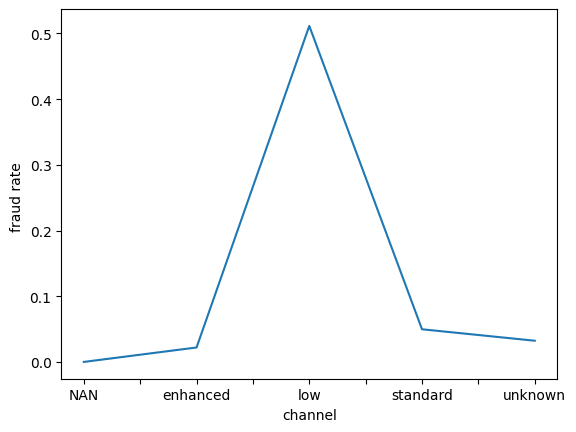

In [92]:
df.groupby('kyc_tier')['is_fraud'].mean().plot.line()
plt.xlabel("channel")
plt.ylabel("fraud rate ")
plt.show()

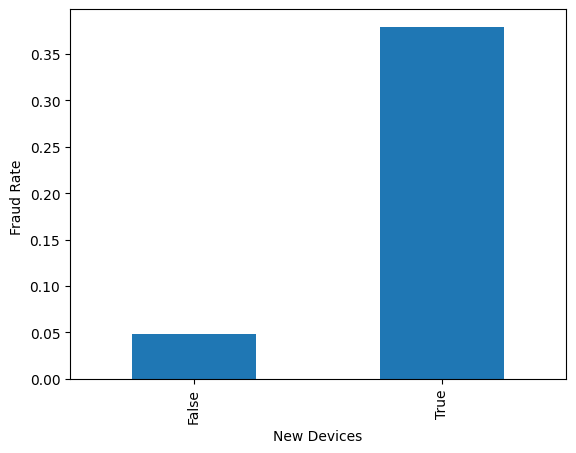

In [90]:
df.groupby('new_device')['is_fraud'].mean().plot.bar()
plt.xlabel("New Devices")
plt.ylabel("Fraud Rate ")
plt.show()

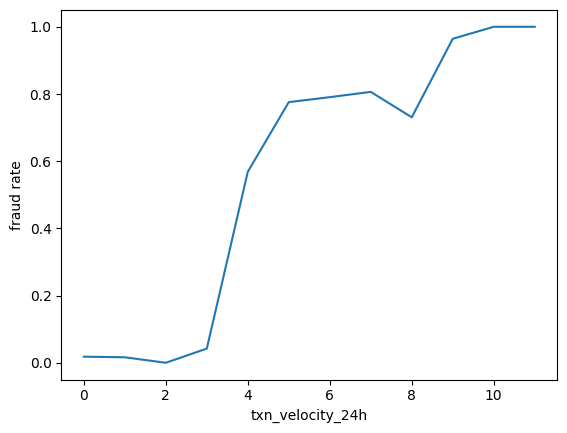

In [89]:
df.groupby('txn_velocity_24h')['is_fraud'].mean().plot.line()
plt.xlabel("txn_velocity_24h")
plt.ylabel("fraud rate")
plt.show()

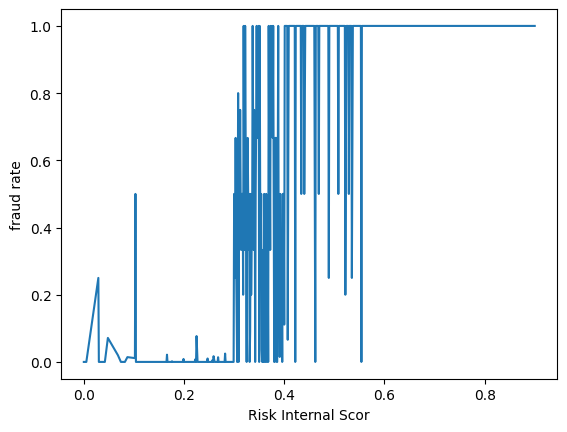

In [98]:
df.groupby('risk_score_internal')['is_fraud'].mean().plot.line()
plt.xlabel("Risk Internal Scor")
plt.ylabel("fraud rate")
plt.show()

Bivariate Analysis

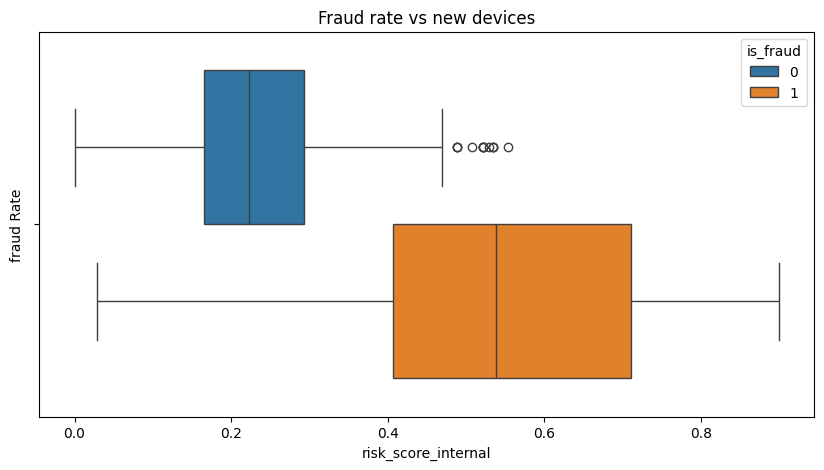

In [68]:
plt.figure(figsize =(10,5))
sns.boxplot(x="risk_score_internal" ,data=df , hue="is_fraud")
plt.xlabel("risk_score_internal")
plt.ylabel("fraud Rate")
plt.title("Fraud rate vs new devices");


In [69]:
df.columns.to_list()

['transaction_id',
 'customer_id',
 'timestamp',
 'home_country',
 'source_currency',
 'dest_currency',
 'channel',
 'amount_src',
 'amount_usd',
 'fee',
 'exchange_rate_src_to_dest',
 'device_id',
 'new_device',
 'ip_address',
 'ip_country',
 'location_mismatch',
 'ip_risk_score',
 'kyc_tier',
 'account_age_days',
 'device_trust_score',
 'chargeback_history_count',
 'risk_score_internal',
 'txn_velocity_1h',
 'txn_velocity_24h',
 'corridor_risk',
 'is_fraud']

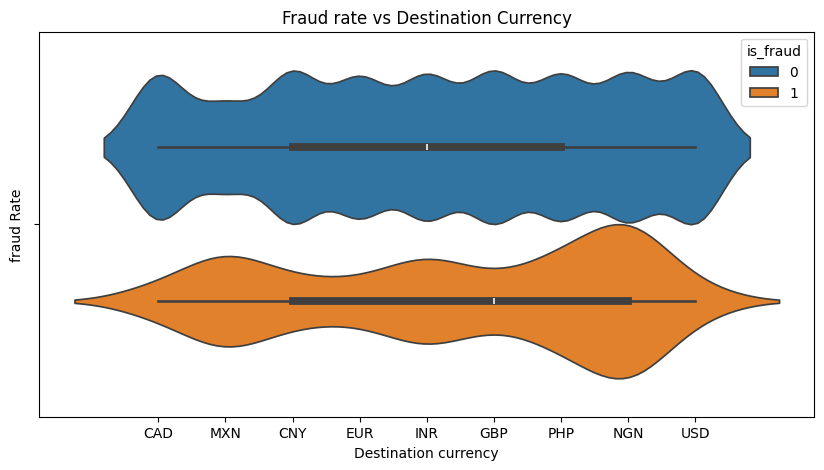

In [70]:
plt.figure(figsize =(10,5))
sns.violinplot(x="dest_currency" ,data=df , hue="is_fraud")
plt.xlabel("Destination currency")
plt.ylabel("fraud Rate")
plt.title("Fraud rate vs Destination Currency");

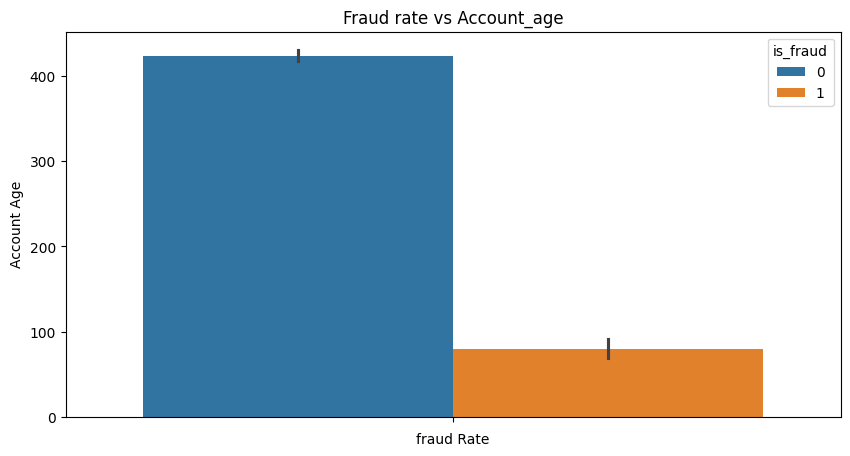

In [87]:
plt.figure(figsize =(10,5))
sns.barplot(y="account_age_days" ,data=df , hue="is_fraud")
plt.ylabel("Account Age")
plt.xlabel("fraud Rate")
plt.title("Fraud rate vs Account_age");

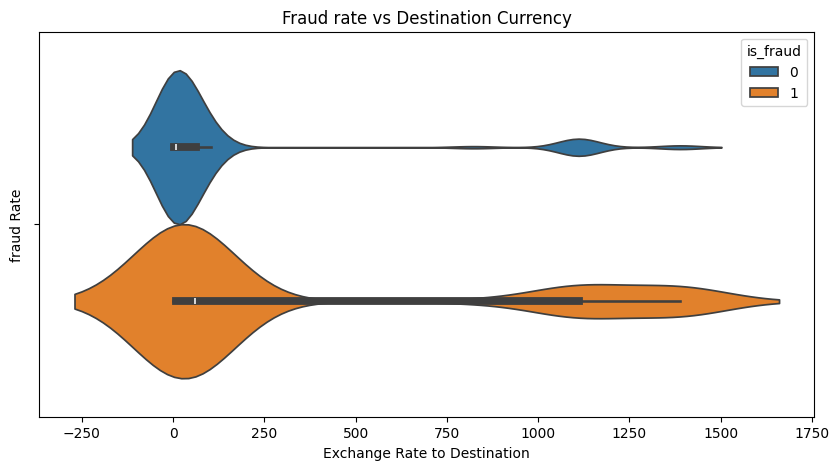

In [99]:
plt.figure(figsize =(10,5))
sns.violinplot(x="exchange_rate_src_to_dest" ,data=df , hue="is_fraud")
plt.xlabel("Exchange Rate to Destination")
plt.ylabel("fraud Rate")
plt.title("Fraud rate vs Destination Currency");

In [ ]:
plt.figure(figsize =(10,5))
sns.countplot(x="timestamp" ,data=df , hue="is_fraud")
plt.xlabel("TimeStamp")
plt.ylabel("fraud Rate")
plt.title("Fraud rate vs Destination Currency");